<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据可视化" data-toc-modified-id="数据可视化-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据可视化</a></span></li><li><span><a href="#准备工作" data-toc-modified-id="准备工作-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>准备工作</a></span></li><li><span><a href="#单变量分布" data-toc-modified-id="单变量分布-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>单变量分布</a></span></li><li><span><a href="#number&amp;number" data-toc-modified-id="number&amp;number-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>number&amp;number</a></span></li><li><span><a href="#object&amp;number" data-toc-modified-id="object&amp;number-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>object&amp;number</a></span></li><li><span><a href="#三变量关系" data-toc-modified-id="三变量关系-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>三变量关系</a></span></li><li><span><a href="#四变量关系" data-toc-modified-id="四变量关系-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>四变量关系</a></span></li><li><span><a href="#其他" data-toc-modified-id="其他-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>其他</a></span></li></ul></div>

# 数据可视化

数据类型: 
    
    number_continuous: 连续性数据, 精准描述, 定量
    number_discrete: 连续型数据, 描述定性/分类/定序
    object: 字符型数据, 描述类别, 

# 准备工作

In [53]:
# 工具包
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from  scipy  import  stats 

%matplotlib inline

In [2]:
# 恢复seaborn默认设置
sns.set()
# 设置随机种子，同一个种子值，产生的随机数相同
np.random.seed(sum(map(ord, "regression"))) # ord 整型
# 餐厅小费案例（seaborn内置）
tips = sns.load_dataset("tips") 
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# 单变量分布

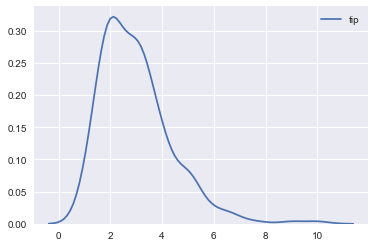

In [3]:
# number_continuous
sns.kdeplot(tips["tip"])

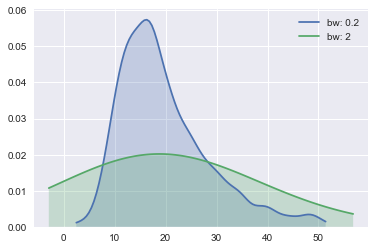

In [11]:
sns.kdeplot(tips["total_bill"], bw=.2, label="bw: 0.2", shade=True)
sns.kdeplot(tips["total_bill"], bw=2, label="bw: 2", shade=True)
# bw:平滑度, label:图例, shade:阴影

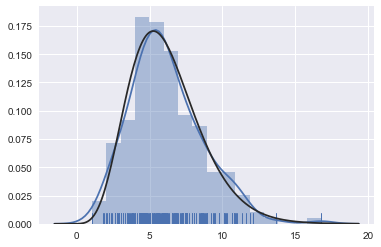

In [13]:
from scipy import stats
# 随机gamma函数
x = np.random.gamma(6, size=200)
# 边际毛毯
sns.rugplot(x)

sns.distplot(x, kde=True, fit=stats.gamma)
# fit拟合stats.gamma函数

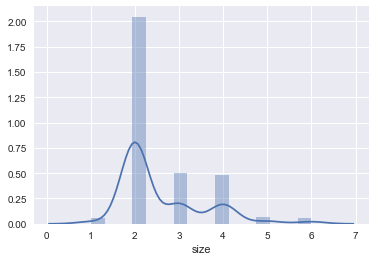

In [4]:
# number_continuous
# number_discrete
sns.distplot(tips["size"])

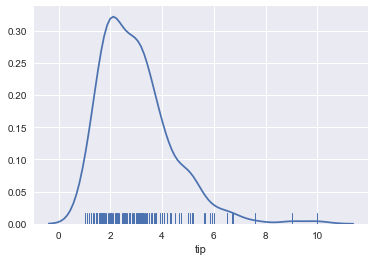

In [8]:
sns.distplot(tips["tip"], kde=True, hist=False, rug=True)

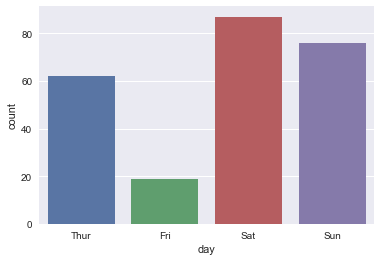

In [5]:
# object
sns.countplot(tips["day"])

# number&number

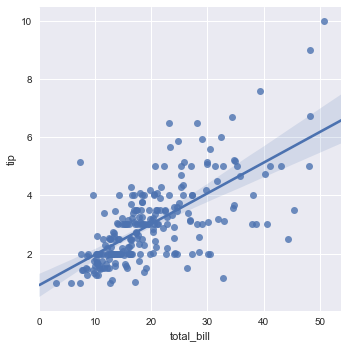

In [22]:
# 散点图 + 线性回归 + 95%置信区间
sns.lmplot(x="total_bill", y="tip", data=tips)

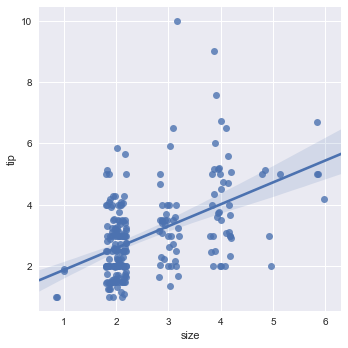

In [23]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.2)
# x_jitter抖动的幅度,在基准位置左右0.2范围内随机抖动

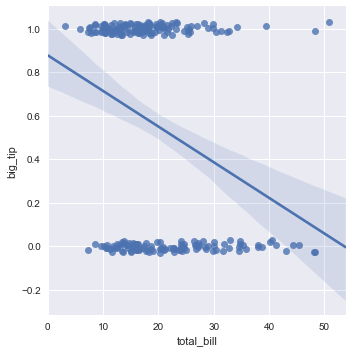

ImportError: No module named 'statsmodels'

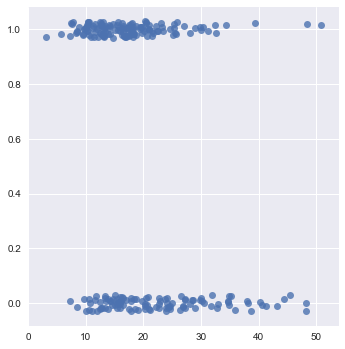

In [70]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.03)
plt.show()
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)
plt.show()
# logistic=True 开启逻辑回归

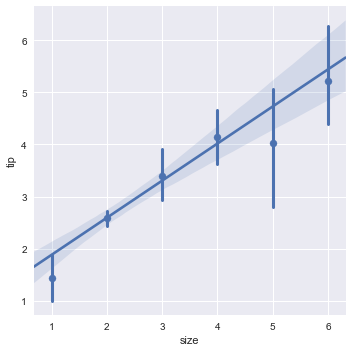

In [49]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

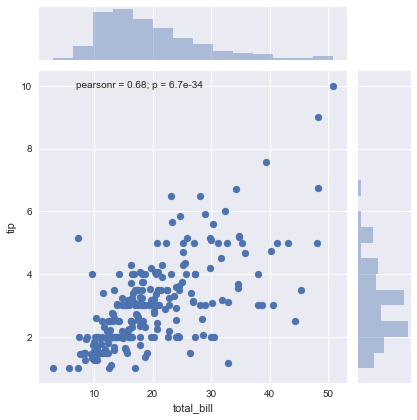

In [15]:
# number_continuous & number_continuous
# number_discrete
sns.jointplot(x=tips["total_bill"], y=tips["tip"])

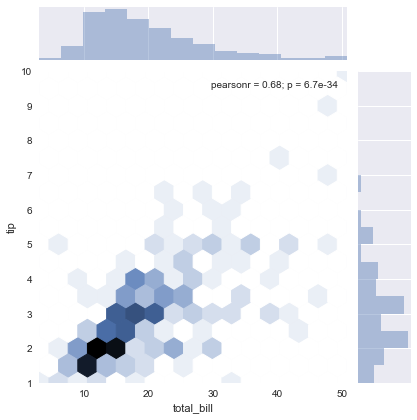

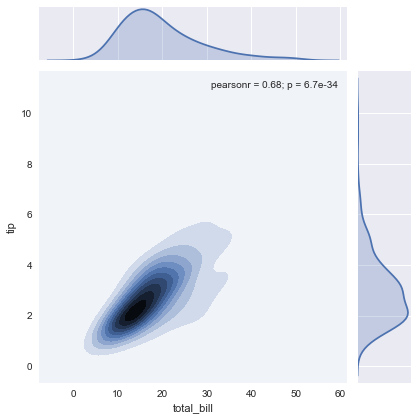

In [18]:
# number_discrete
sns.jointplot(x=tips["total_bill"], y=tips["tip"], kind="hex")
plt.show()
sns.jointplot(x=tips["total_bill"], y=tips["tip"], kind="kde")
plt.show()

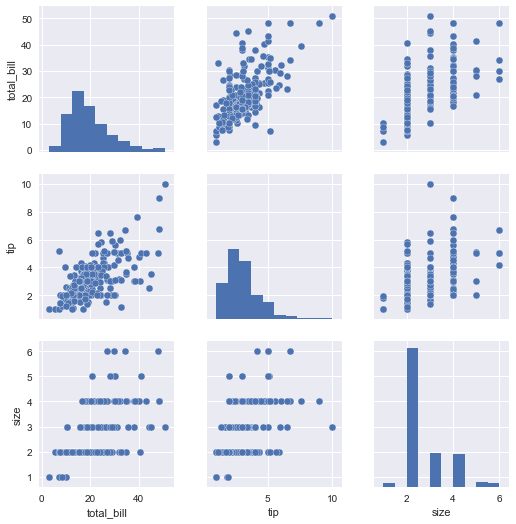

In [19]:
# 只能处理number
sns.pairplot(tips)

# object&number

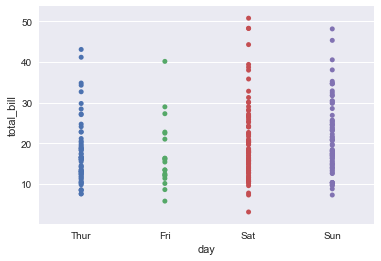

In [20]:
sns.stripplot(x="day", y="total_bill", data=tips)
# 点太过于集中, 可以更改alpha, 或加jitter

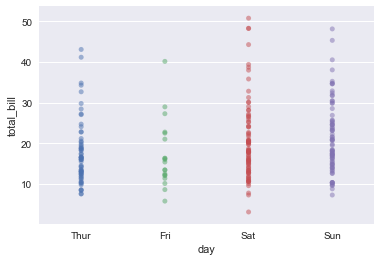

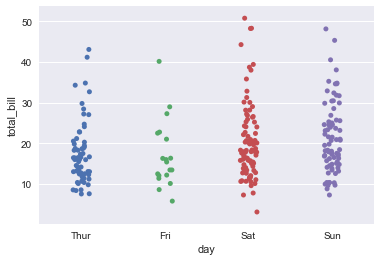

In [33]:
sns.stripplot(x="day", y="total_bill", data=tips, alpha=0.5)
plt.show()
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.show()
# object上加一个小的抖动

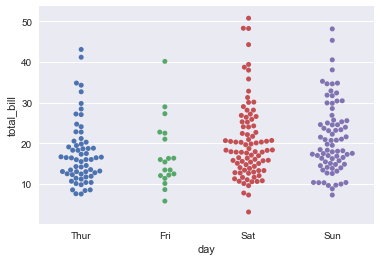

In [29]:
# 另外一种处理办法，是生成蜂群图，避免散点重叠~
sns.swarmplot(x="day", y="total_bill", data=tips)

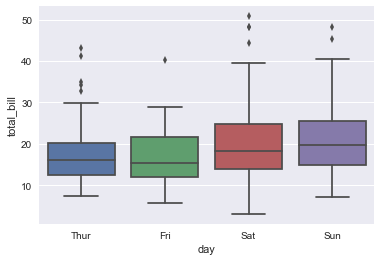

In [34]:
sns.boxplot(x="day", y="total_bill", data=tips)

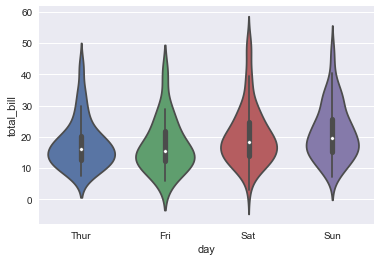

In [35]:
sns.violinplot(x="day", y="total_bill", data=tips)

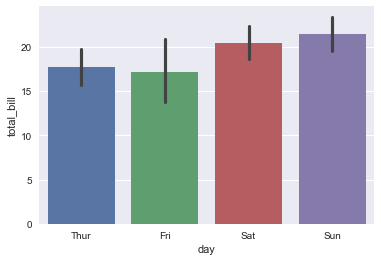

In [36]:
sns.barplot(x="day", y="total_bill", data=tips)
# 黑色线是对应的方差

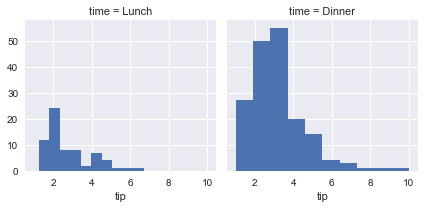

In [55]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")

# 三变量关系

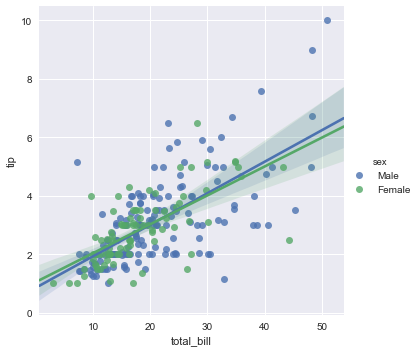

In [40]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips)

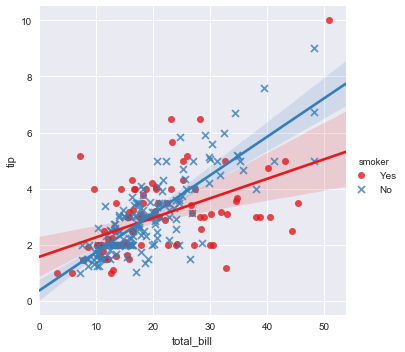

In [52]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1") # markers 标记区分

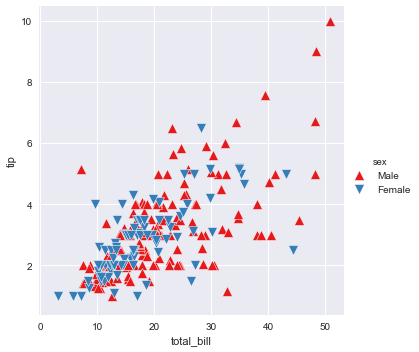

In [64]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

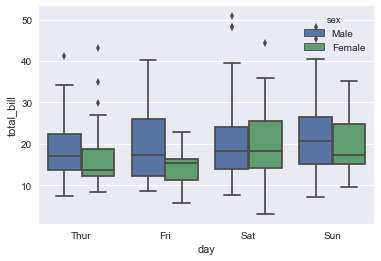

In [37]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)

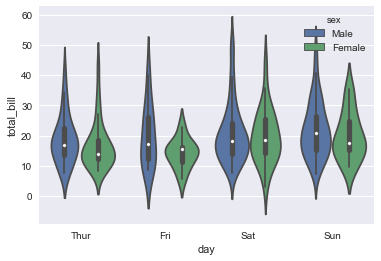

In [38]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)

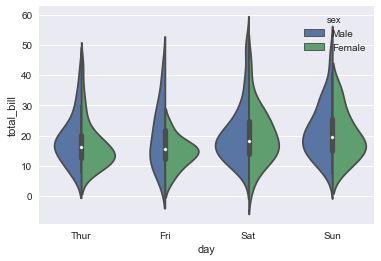

In [39]:
# split：一边一类
# inner：box箱式图，quartiles分位数，point或者 stick 直接标明样本
sns.violinplot(x="day", y="total_bill"
               , hue="sex", data=tips, split=True, inner="box")

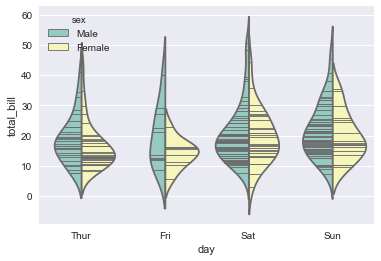

In [43]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3")

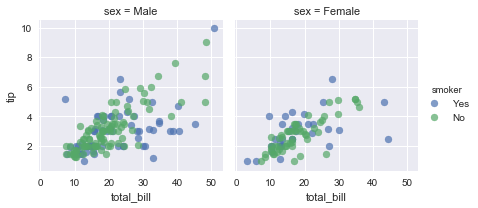

In [56]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

I:\Anaconda2\envs\python3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


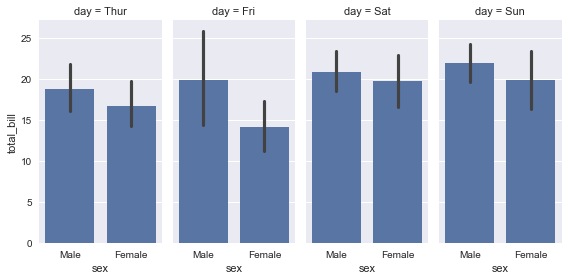

In [57]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill")

I:\Anaconda2\envs\python3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


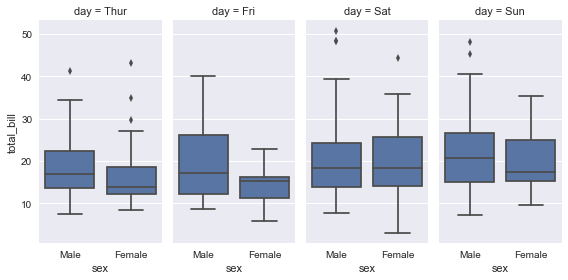

In [63]:
g = sns.FacetGrid(tips, col="day", sharex=False, size=4, aspect=.5)
g.map(sns.boxplot, "sex", "total_bill")

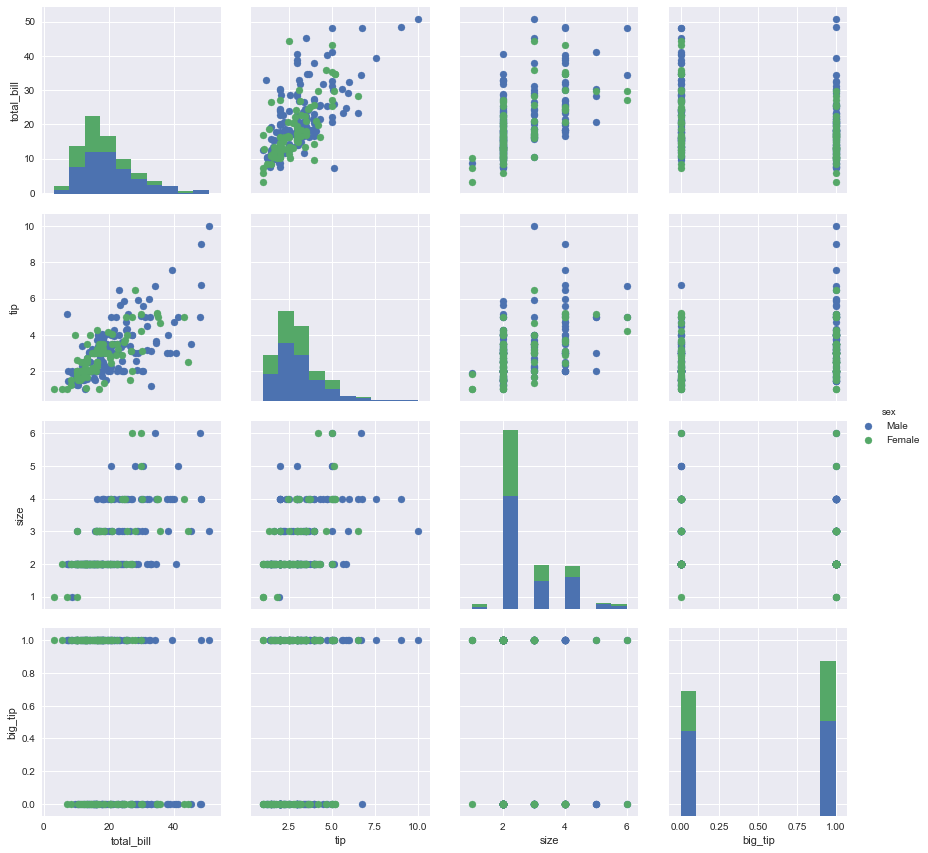

In [68]:
g = sns.PairGrid(tips, hue="sex", size=3)
g.map_diag(plt.hist)  # 对角线是hist
g.map_offdiag(plt.scatter) # 其余是scatter
g.add_legend()

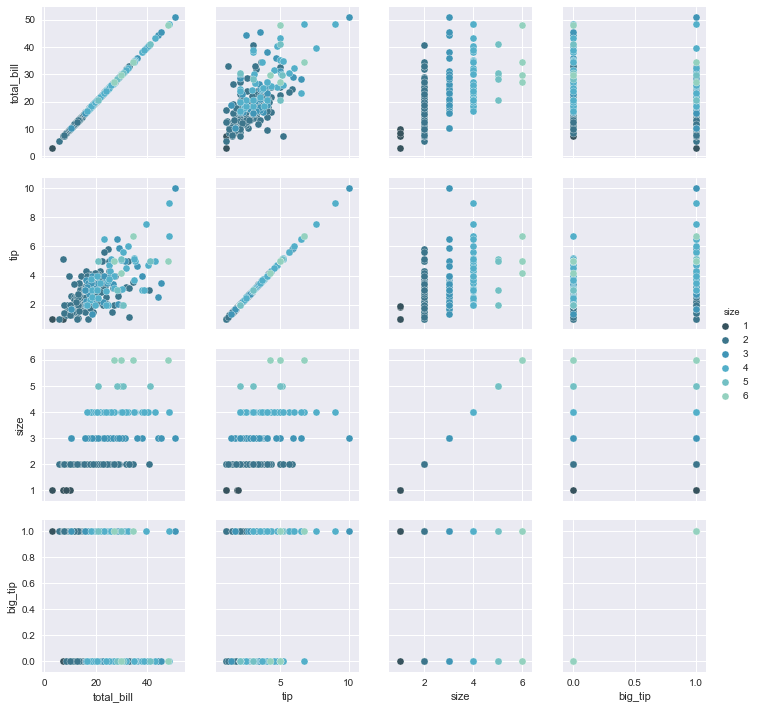

In [69]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

# 四变量关系

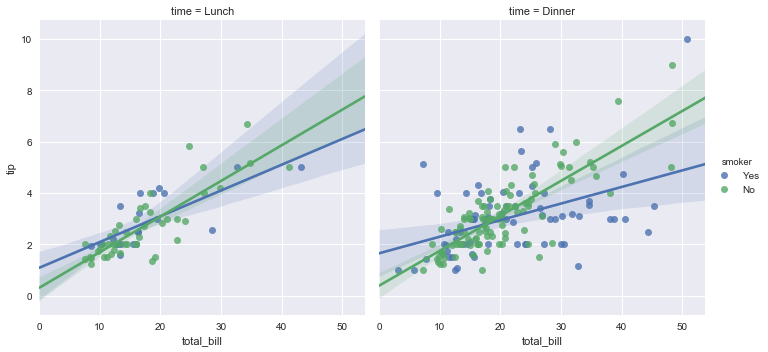

In [42]:
# col表示不同列
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips) 

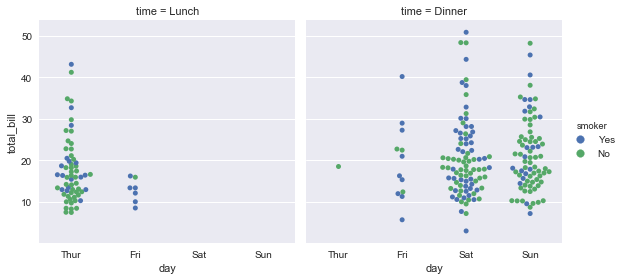

In [46]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm")

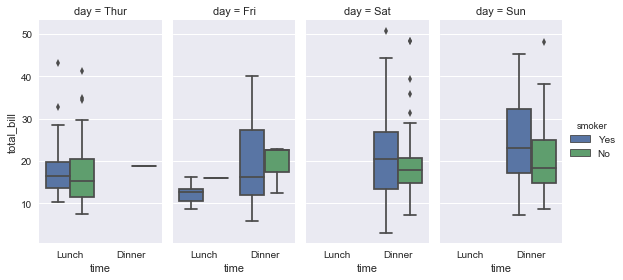

In [47]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5)

# 其他

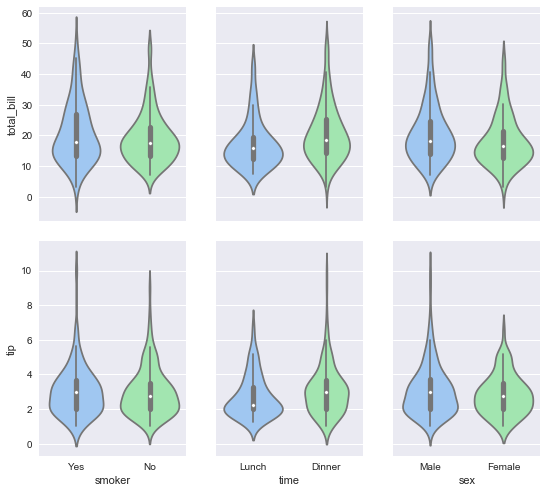

In [48]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel")

In [71]:
sns.residplot(x="x", y="y") 
#拟合的好，就是0均值的白噪声分布N(0,σ2)N(0,σ2)，
#不含任何人为模态（测量误差造成）
#拟合的差，就能看出一些模式

NameError: name 'anscombe' is not defined